In [69]:
import pandas as pd 
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

In [70]:
df=pd.read_csv("/Users/neeharikasinha/Documents/datascience-course/Capstone1/Data_Entry_2017.csv") 
print(df.head(3))

        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN  
1                        0.143  0.143          NaN  
2                        0.168  0.168          NaN  


In [71]:
#renaming the columns names
df.rename(columns={'Image Index':'img_index','Finding Labels':'labels','Follow-up #':'follow_up','Patient ID':'pa_id',
                   'Patient Age':'pa_age','Patient Gender':'pa_gender','View Position':'view_position'}, inplace=True)

In [72]:
df.columns

Index(['img_index', 'labels', 'follow_up', 'pa_id', 'pa_age', 'pa_gender',
       'view_position', 'OriginalImage[Width', 'Height]',
       'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

In [73]:
df.isnull().sum()

img_index                           0
labels                              0
follow_up                           0
pa_id                               0
pa_age                              0
pa_gender                           0
view_position                       0
OriginalImage[Width                 0
Height]                             0
OriginalImagePixelSpacing[x         0
y]                                  0
Unnamed: 11                    112120
dtype: int64

In [74]:
disease_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 
'Cardiomegaly', 'Nodule', 'Mass', 'Hernia'] 

In [75]:
for label in disease_labels:
    df[label] = df['labels'].map(lambda result: 1.0 if label in result else 0)
df.head()

,img_index,labels,follow_up,pa_id,pa_age,pa_gender,view_position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
unique_labels = df[disease_labels].sum().sort_values(ascending= False) 
print(unique_labels[:5]) 

Infiltration    19894.0
Effusion        13317.0
Atelectasis     11559.0
Nodule           6331.0
Mass             5782.0
dtype: float64


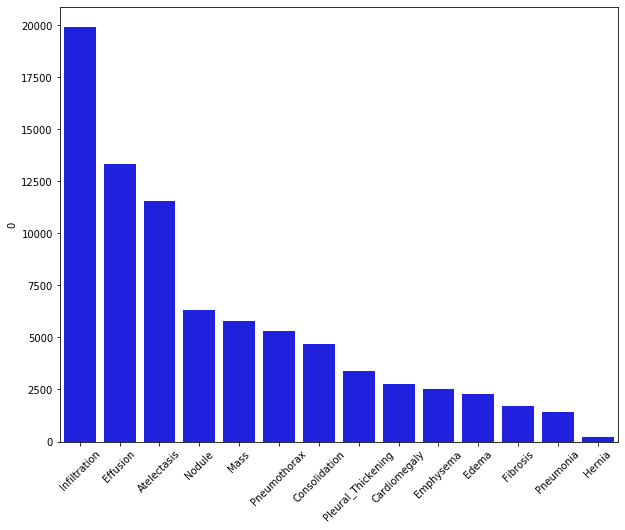

In [77]:
plt.figure(figsize=(10,8)) 
unique_labels_df = unique_labels.to_frame() 
sns.barplot(x = unique_labels_df.index[::], y= 0, data = unique_labels_df[::], color = "blue"), plt.xticks(rotation = 45) # visualize results graphically
plt.savefig('Number of patients with unique labels_infection')

Infiltration is the diffusion or accumulation (in a tissue or cells) of foreign substances or in amounts in excess of the normal. The material collected in those tissues or cells is called infiltrate.

In [83]:
df.loc[df.labels.str.contains('Infiltration'), 'diagnosis'] = 1 


In [85]:
df['diagnosis'] = df['diagnosis'].fillna(0)

In [86]:
df.head()

,img_index,labels,follow_up,pa_id,pa_age,pa_gender,view_position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,diagnosis
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [87]:
count = df.diagnosis.value_counts()
count

0.0    92226
1.0    19894
Name: diagnosis, dtype: int64

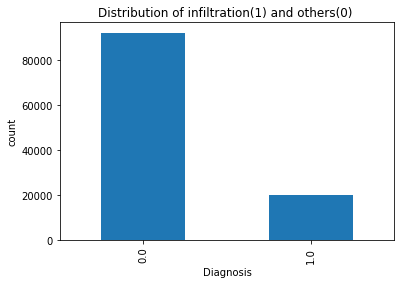

In [88]:
count.plot(kind='bar')
plt.title("Distribution of infiltration(1) and others(0) ")
plt.xlabel("Diagnosis")
plt.ylabel("count");

In [89]:
y_target = df['diagnosis']

In [90]:
df.columns.values

array(['img_index', 'labels', 'follow_up', 'pa_id', 'pa_age', 'pa_gender',
       'view_position', 'OriginalImage[Width', 'Height]',
       'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11', 'Atelectasis',
       'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema',
       'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia',
       'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia',
       'diagnosis'], dtype=object)

Let us now plot out the pairplot of different features to determine which features are better at classifying the 2 classes of our problem and dropping the undesired column

In [99]:
df_tidy=df.drop(columns=['img_index', 'labels','follow_up', 'pa_id','view_position', 'OriginalImage[Width', 'Height]',
       'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11','Atelectasis',
       'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema',
       'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia',
       'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia',])

In [100]:
df_tidy.columns

Index(['pa_age', 'pa_gender', 'diagnosis', 'target'], dtype='object')

In [103]:
df['target'] = df['diagnosis'].map({0:'N',1:'I'}) # converting the data into categorical

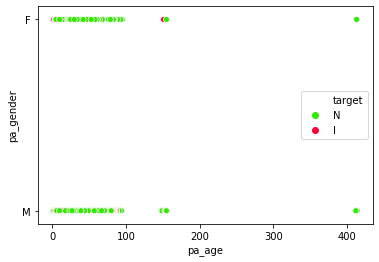

In [106]:
sns.scatterplot(x='pa_age', y = 'pa_gender', data = df, hue = 'target', palette='prism');

Redo the work by removing the age


In [155]:
df2=pd.read_csv("/Users/neeharikasinha/Documents/datascience-course/Capstone1/Data_Entry_2017.csv") 
print(df2.head(3))

        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN  
1                        0.143  0.143          NaN  
2                        0.168  0.168          NaN  


In [156]:
#renaming the columns names
df2.rename(columns={'Image Index':'img_index','Finding Labels':'labels','Follow-up #':'follow_up','Patient ID':'pa_id',
                   'Patient Age':'pa_age','Patient Gender':'pa_gender','View Position':'view_position'}, inplace=True)

In [157]:
df2.head()

,img_index,labels,follow_up,pa_id,pa_age,pa_gender,view_position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [158]:
Age_below_117 = df2['pa_age'] < 117 
df2[Age_below_117]
df2_age=df2[Age_below_117]

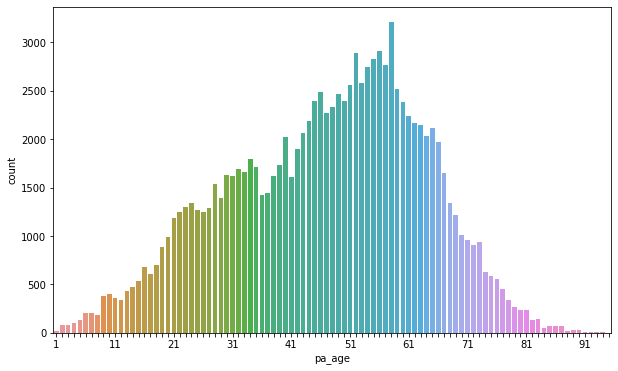

In [159]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df2_age.pa_age) 
 
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.show()

In [163]:
df2_age.columns

Index(['img_index', 'labels', 'follow_up', 'pa_id', 'pa_age', 'pa_gender',
       'view_position', 'OriginalImage[Width', 'Height]',
       'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

In [164]:
df2_age.isnull().sum()

img_index                           0
labels                              0
follow_up                           0
pa_id                               0
pa_age                              0
pa_gender                           0
view_position                       0
OriginalImage[Width                 0
Height]                             0
OriginalImagePixelSpacing[x         0
y]                                  0
Unnamed: 11                    112104
dtype: int64

In [162]:
disease_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 
'Cardiomegaly', 'Nodule', 'Mass', 'Hernia'] 

In [167]:
for label in disease_labels:
    df2_age[label] = df2_age['labels'].map(lambda result: 1.0 if label in result else 0)
df2_age.head()

/Users/neeharikasinha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,img_index,labels,follow_up,pa_id,pa_age,pa_gender,view_position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [168]:
unique_labels = df2_age[disease_labels].sum().sort_values(ascending= False) 
print(unique_labels[:5]) 

Infiltration    19891.0
Effusion        13316.0
Atelectasis     11558.0
Nodule           6331.0
Mass             5779.0
dtype: float64


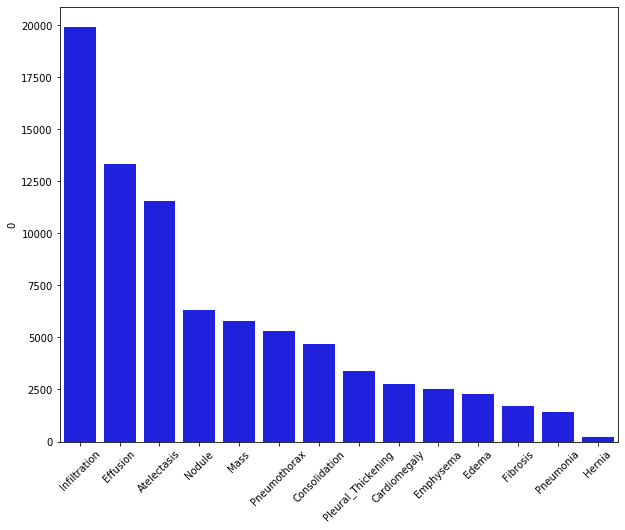

In [169]:
plt.figure(figsize=(10,8)) 
unique_labels_df2 = unique_labels.to_frame() 
sns.barplot(x = unique_labels_df.index[::], y= 0, data = unique_labels_df[::], color = "blue"), plt.xticks(rotation = 45) # visualize results graphically
plt.savefig('Number of patients with unique labels_infection')

Infiltration is the diffusion or accumulation (in a tissue or cells) of foreign substances or in amounts in excess of the normal. The material collected in those tissues or cells is called infiltrate.

In [170]:
df2_age.loc[df2_age.labels.str.contains('Infiltration'), 'diagnosis'] = 1 


/Users/neeharikasinha/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/neeharikasinha/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [171]:
df2_age['diagnosis'] = df2_age['diagnosis'].fillna(0)

/Users/neeharikasinha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [172]:
df2_age.head()

,img_index,labels,follow_up,pa_id,pa_age,pa_gender,view_position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia,diagnosis
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [173]:
count = df2_age.diagnosis.value_counts()
count

0.0    92213
1.0    19891
Name: diagnosis, dtype: int64

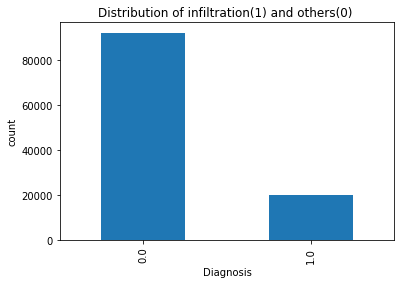

In [174]:
count.plot(kind='bar')
plt.title("Distribution of infiltration(1) and others(0) ")
plt.xlabel("Diagnosis")
plt.ylabel("count");

In [175]:
y_target = df2_age['diagnosis']

In [176]:
df2_age.columns.values

array(['img_index', 'labels', 'follow_up', 'pa_id', 'pa_age', 'pa_gender',
       'view_position', 'OriginalImage[Width', 'Height]',
       'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11', 'Atelectasis',
       'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema',
       'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia',
       'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia',
       'diagnosis'], dtype=object)

Let us now plot out the pairplot of different features to determine which features are better at classifying the 2 classes of our problem and dropping the undesired column

In [177]:
df2_age_tidy=df2_age.drop(columns=['img_index', 'labels','follow_up', 'pa_id','view_position', 'OriginalImage[Width', 'Height]',
       'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11','Atelectasis',
       'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema',
       'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia',
       'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia',])

In [178]:
df2_age_tidy.columns

Index(['pa_age', 'pa_gender', 'diagnosis'], dtype='object')

In [179]:
df2_age['target'] = df2_age['diagnosis'].map({0:'N',1:'I'}) # converting the data into categorical

/Users/neeharikasinha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


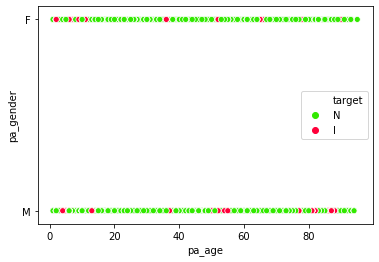

In [180]:
sns.scatterplot(x='pa_age', y = 'pa_gender', data = df2_age, hue = 'target', palette='prism');

Nate: 
There are only two features to predict infilteration. What else should I add to answer the question " What is the chances that a random person will get any of these 14 Common Thorax Disease Categories" 